**ASHRAY ANAND**


**ROLL: MDS201905**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam

# splitting tool for the validation set
from sklearn.model_selection import train_test_split

# to block unnecesarry warnings for updates etc.
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('/content/drive/My Drive/Data/gp.py','wb').write(src)
import gp

%load gp.py
%run gp.py

In [ ]:
X = np.load("/content/drive/My Drive/Data/X.npy")
Y = np.load("/content/drive/My Drive/Data/Y.npy")

In [ ]:
# Since X is a .npy I will use manual ways to figure it out.

print(" Max value of X: ",X.max())
print(" Min value of X: ",X.min())
print(" Shape of X: ",X.shape)

print("\n Max value of Y: ",Y.max())
print(" Min value of Y: ",Y.min())
print(" Shape of Y: ",Y.shape)

 Max value of X:  1.0
 Min value of X:  0.003921569
 Shape of X:  (2062, 64, 64)

 Max value of Y:  1.0
 Min value of Y:  0.0
 Shape of Y:  (2062, 10)


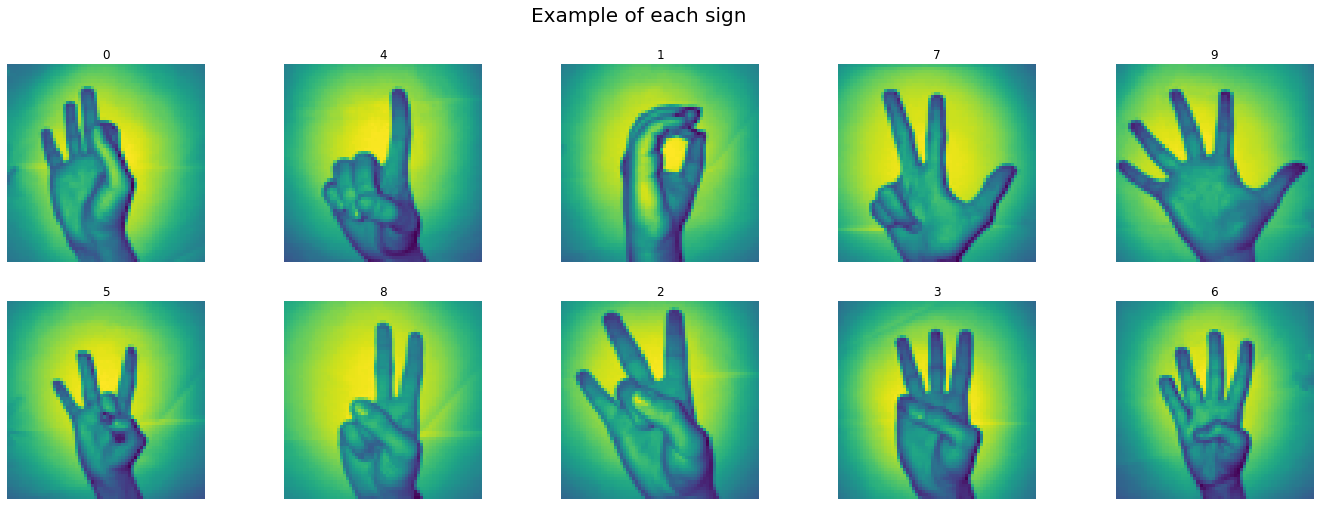

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title(Y[0].argmax())
plt.imshow(X[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(Y[1000].argmax())
plt.imshow(X[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(Y[222].argmax())
plt.imshow(X[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(Y[1500].argmax())
plt.imshow(X[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(Y[2000].argmax())
plt.imshow(X[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(Y[1200].argmax())
plt.imshow(X[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(Y[1700].argmax())
plt.imshow(X[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(Y[500].argmax())
plt.imshow(X[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(Y[700].argmax())
plt.imshow(X[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(Y[1400].argmax())
plt.imshow(X[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()

In [ ]:
x_9 = X[:204]; x_0 = X[204:409]; x_7 = X[409:615]; x_6 = X[615:822]; x_1 = X[822:1028]; 
x_8 = X[1028:1236]; x_4 = X[1236:1443]; x_3 = X[1443:1649]; x_2 = X[1649:1855]; x_5 = X[1855:];

In [ ]:
mean0 = x_0.mean(axis=0); mean1 = x_1.mean(axis=0); mean2 = x_2.mean(axis=0);
mean3 = x_3.mean(axis=0); mean4 = x_4.mean(axis=0); mean5 = x_5.mean(axis=0);
mean6 = x_6.mean(axis=0); mean7 = x_7.mean(axis=0); mean8 = x_8.mean(axis=0); mean9 = x_9.mean(axis=0);

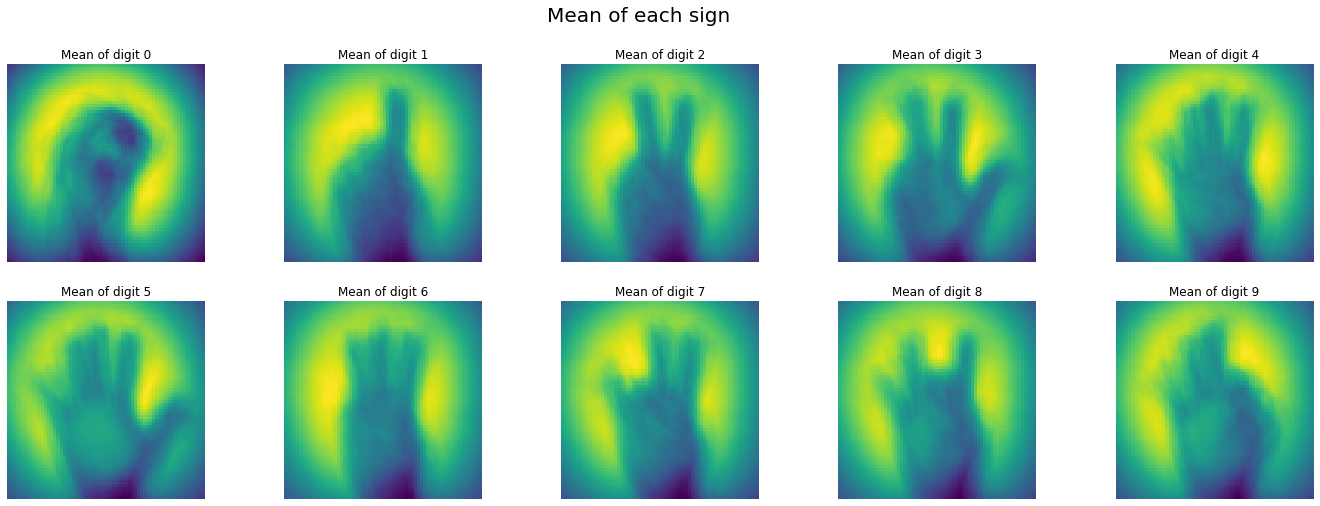

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title("Mean of digit 0")
plt.imshow(mean0)
plt.axis("off")

plt.subplot(2,5,2)
plt.title("Mean of digit 1")
plt.imshow(mean1)
plt.axis("off")

plt.subplot(2,5,3)
plt.title("Mean of digit 2")
plt.imshow(mean2)
plt.axis("off")

plt.subplot(2,5,4)
plt.title("Mean of digit 3")
plt.imshow(mean3)
plt.axis("off")

plt.subplot(2,5,5)
plt.title("Mean of digit 4")
plt.imshow(mean4)
plt.axis("off")

plt.subplot(2,5,6)
plt.title("Mean of digit 5")
plt.imshow(mean5)
plt.axis("off")

plt.subplot(2,5,7)
plt.title("Mean of digit 6")
plt.imshow(mean6)
plt.axis("off")

plt.subplot(2,5,8)
plt.title("Mean of digit 7")
plt.imshow(mean7)
plt.axis("off")

plt.subplot(2,5,9)
plt.title("Mean of digit 8")
plt.imshow(mean8)
plt.axis("off")

plt.subplot(2,5,10)
plt.title("Mean of digit 9")
plt.imshow(mean9)
plt.axis("off")

plt.suptitle("Mean of each sign", fontsize=20)
plt.show()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

In [ ]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))


CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

In [ ]:
CNN_model.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [ ]:
results = CNN_model.fit(x_train,y_train,epochs=70,validation_data=(x_test,y_test))

Epoch 1/70
52/52 [==============================] - 1s 18ms/step - loss: 2.3033 - accuracy: 0.1086 - val_loss: 2.3024 - val_accuracy: 0.1162
Epoch 2/70
52/52 [==============================] - 1s 11ms/step - loss: 2.3007 - accuracy: 0.1116 - val_loss: 2.2930 - val_accuracy: 0.2155
Epoch 3/70
52/52 [==============================] - 1s 11ms/step - loss: 2.0504 - accuracy: 0.2856 - val_loss: 1.3637 - val_accuracy: 0.5521
Epoch 4/70
52/52 [==============================] - 1s 11ms/step - loss: 1.1300 - accuracy: 0.6380 - val_loss: 0.7657 - val_accuracy: 0.7482
Epoch 5/70
52/52 [==============================] - 1s 11ms/step - loss: 0.8515 - accuracy: 0.7168 - val_loss: 0.6272 - val_accuracy: 0.8136
Epoch 6/70
52/52 [==============================] - 1s 12ms/step - loss: 0.6801 - accuracy: 0.7823 - val_loss: 0.5276 - val_accuracy: 0.8257
Epoch 7/70
52/52 [==============================] - 1s 11ms/step - loss: 0.5730 - accuracy: 0.8059 - val_loss: 0.4447 - val_accuracy: 0.8620
Epoch 8/70
52

In [ ]:
print(np.max(results.history['val_accuracy']))

0.9564164876937866


Validation accuracy is 0.9564164876937866. We will try to improve this with Bayesian Optimization with best hperparameters selection.

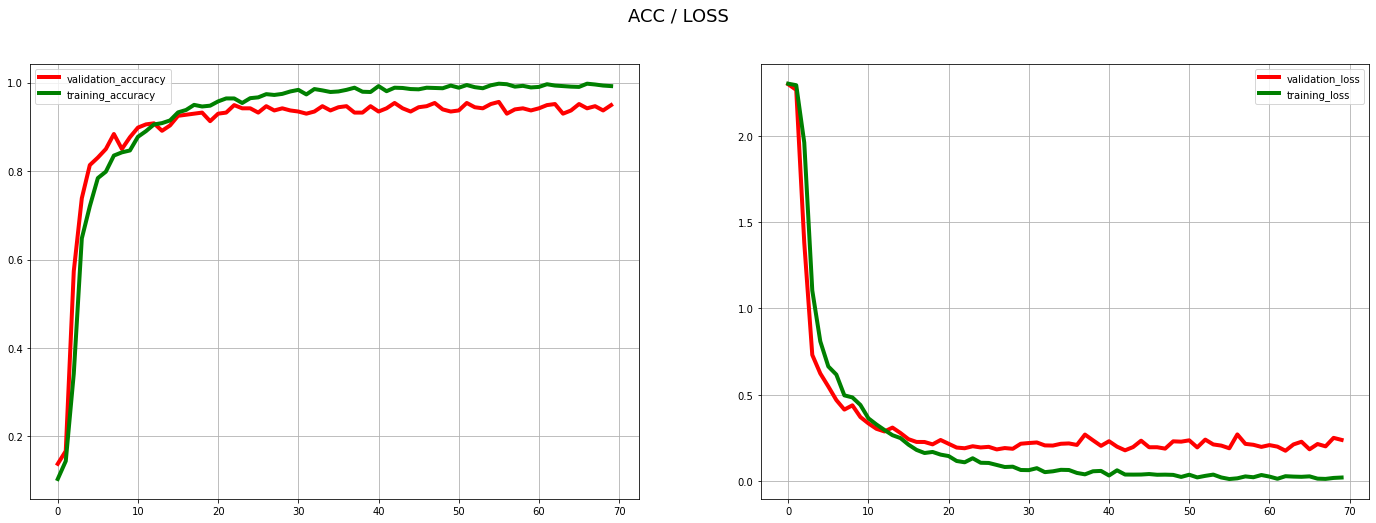

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

**BAYESIAN OPTIMIZATION**

Optimizing for number of filters of CNN, No. of CNN layers, No. of Dense layer unit, No. of Dense layer, dropout, learning rate,  batch_size, kernel_size

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

def sample_loss_CNN(parameters):
    filters=np.int(parameters[0])
    conlayers= np.int(parameters[1])
    denseunit= np.int(parameters[2])
    denselayers= np.int(parameters[3])
    dropout= parameters[4]
    lr= parameters[5]
    batch_size= np.int(parameters[6])
    k=np.int(parameters[7])
    CNN_model= Sequential()
    CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
    CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
    CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
    for i in range(conlayers):
      CNN_model.add(Conv2D(filters=filters, kernel_size=(k,k), padding = 'same'))
      CNN_model.add(MaxPooling2D(pool_size=(2,2)))
      CNN_model.add(Dropout(dropout))
    
    CNN_model.add(Flatten())
    for i in range(denselayers):
      CNN_model.add(Dense(denseunit, activation='relu'))

    CNN_model.add(Dense(10,activation="softmax"))
    CNN_model.compile(optimizer=keras.optimizers.Adam(lr = lr),loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
    callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose = 1)   
    results2= CNN_model.fit(x_train, y_train,batch_size = batch_size, epochs = 30,validation_data=(x_test, y_test), callbacks= [callback],verbose = 0)
    
    return np.max(results2.history['val_accuracy'])

In [ ]:
bounds = np.array([[16, 128],  [3,6],    [16,150],    [2,6],     [0.1,0.7],  [0.0001, 0.0007],  [30,60],    [2,5]])
#                   filters,  conlayers, denseunit, denselayer,    dropout,    learningrate,  batch_size, kernel_size

>HyperParameter | Bound
>--- | ---
>No. of filters of CNN layer | [16,128]
>No. of CNN layers | [3,6]
>Dense Units | [16,150]
>No. of Dense layers | [2,6]
>Dropout | [0.1,0.7]
>Learning Rate | [0.0001, 0.0007]
>Batch Size | [30,60]
>Kernel Size | [2,5]


In [ ]:
xp, yp = bayesian_optimisation(n_iters=15, sample_loss=sample_loss_CNN,bounds=bounds, n_pre_samples=10)

Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
Epoch 00021: early stopping


In [ ]:
xp_hat = xp[np.array(yp).argmax(), :]
print('optimized hyperparameters below are in order"' ,'filters, conlayers, denseunit, denselayer, dropout, learningrate, batch_size, kernel_size',sep='\n')
print(xp_hat)

optimized hyperparameters below are in order"
filters, conlayers, denseunit, denselayer, dropout, learningrate, batch_size, kernel_size
[6.28872920e+01 3.57588706e+00 4.80181914e+01 3.83660135e+00
 3.00333660e-01 4.98333176e-04 5.16668163e+01 4.25819467e+00]


In [ ]:
def sample_loss_CNN_optimized(parameters):
    filters=np.int(parameters[0])
    conlayers= np.int(parameters[1])
    denseunit= np.int(parameters[2])
    denselayers= np.int(parameters[3])
    dropout= parameters[4]
    lr= parameters[5]
    batch_size= np.int(parameters[6])
    k=np.int(parameters[7])
    CNN_model= Sequential()
    CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
    CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
    CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
    for i in range(conlayers):
      CNN_model.add(Conv2D(filters=filters, kernel_size=(k,k), padding = 'same'))
      CNN_model.add(MaxPooling2D(pool_size=(2,2)))
      CNN_model.add(Dropout(dropout))
    
    CNN_model.add(Flatten())
    for i in range(denselayers):
      CNN_model.add(Dense(denseunit, activation='relu'))

    CNN_model.add(Dense(10,activation="softmax"))
    CNN_model.compile(optimizer=keras.optimizers.Adam(lr = lr),loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
    callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose = 1)   
    results2= CNN_model.fit(x_train, y_train,batch_size = batch_size, epochs = 30,validation_data=(x_test, y_test), callbacks= [callback],verbose = 0)
    return results2

In [ ]:
optimized_results=sample_loss_CNN_optimized(xp_hat)

In [ ]:
print(np.max(optimized_results.history["val_accuracy"])) 

0.9782082438468933


Validation accuracy is 0.978 after bayesian optimization on best selected hyperparameter. A 2% increase from our base model accuracy. As our base model was already optimized to some extent, so only a little optimization was possible. 

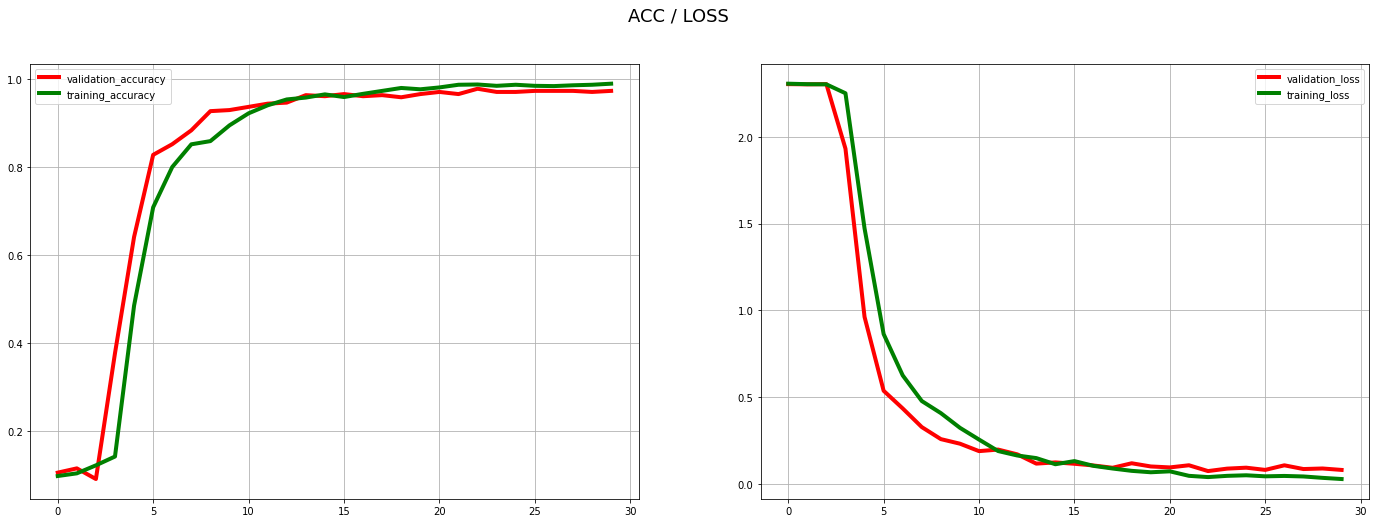

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(optimized_results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(optimized_results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(optimized_results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(optimized_results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()